La base de datos de quejas del consumidor es una colección de quejas sobre productos y servicios de consumo.

Objetivo General: Predicción de tendencias de quejas sobre los productos para años posteriores y de esta forma tomar correctivos y medidas en la gestión sobre cada produto para disminuir las quejas.

1. Cantidad de quejas por año y productos

2. Canal de comunicación con mayor número de quejas

3. Compañias que cuentan con mas quejas

4. Zonas que presentan mayores afectaciones

5. Análisis de tiempos de respuestas de las compañias al consumidor y si cuentan con rtas oportunas

6. Desarrollo de modelo de Machine Learning capaz de dar la predicciones acerca de la tendencia de quejas por producto

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
consumer = pd.DataFrame(pd.read_csv("Consumer_Complaints.csv"))
consumer.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,3/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,3/17/2014,Closed with explanation,Yes,No,759217
1,10/1/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/5/2016,Closed with explanation,Yes,No,2141773


In [3]:
consumer.isna().sum().sort_values(ascending = False)

Tags                            777945
Consumer complaint narrative    704013
Company public response         646002
Consumer consent provided?      528549
Sub-issue                       477597
Sub-product                     235160
Consumer disputed?              135408
ZIP code                          9278
State                             9225
Date sent to company                 0
Timely response?                     0
Company response to consumer         0
Date received                        0
Submitted via                        0
Product                              0
Company                              0
Issue                                0
Complaint ID                         0
dtype: int64

In [4]:
consumer.drop(columns = ["Tags", "Consumer complaint narrative"
                         ,"Company public response"
                         ,"Consumer consent provided?"
                         ,"Sub-issue" 
                         ,"Sub-product"
                         ,"Consumer disputed?"
                         ,"ZIP code"
                         ,"Issue"
                         ,"Complaint ID"], inplace = True)

In [5]:
consumer.columns

Index(['Date received', 'Product', 'Company', 'State', 'Submitted via',
       'Date sent to company', 'Company response to consumer',
       'Timely response?'],
      dtype='object')

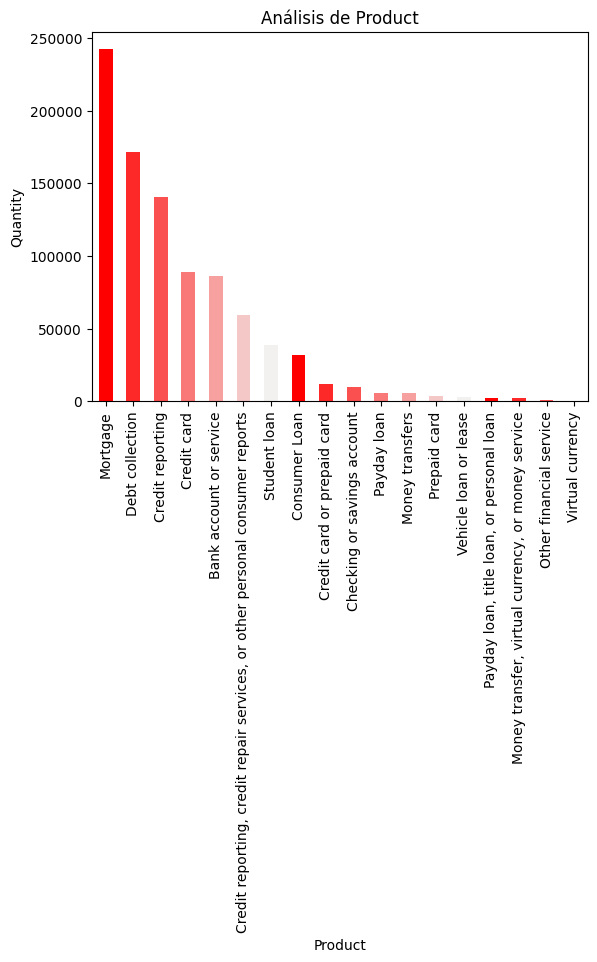

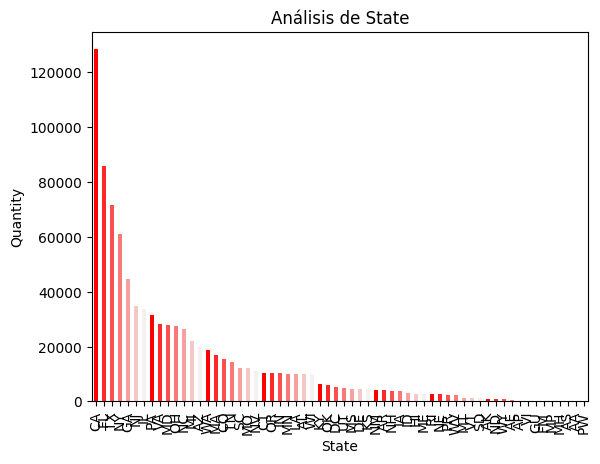

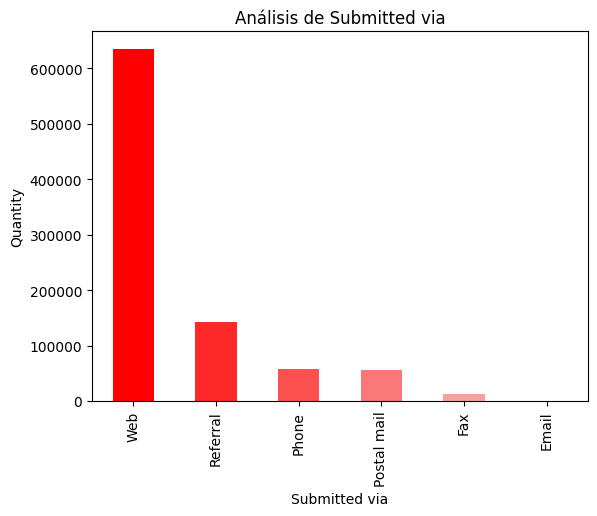

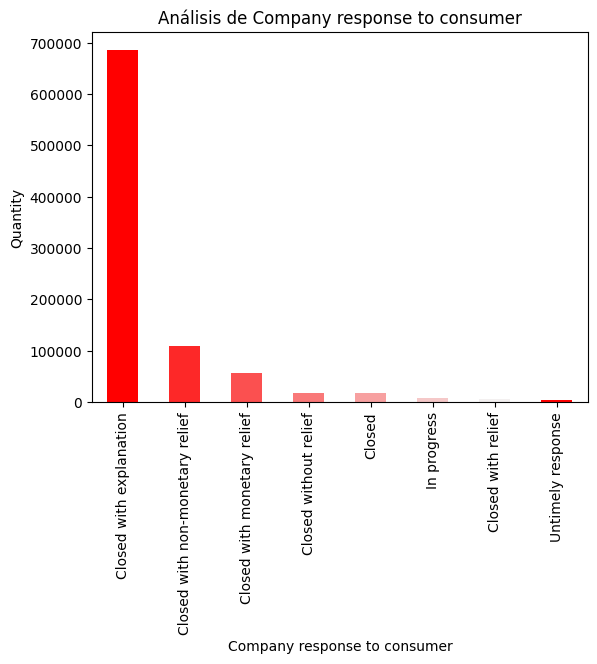

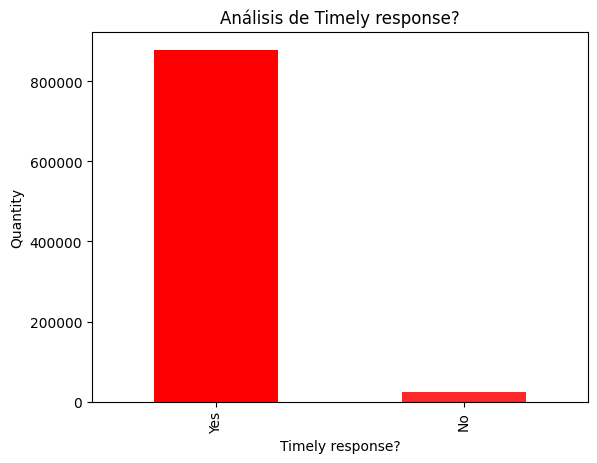

In [6]:
def categoricas(dataframe, eliminar_variable):
    cat_types = dataframe.select_dtypes("O")
    cat_types = cat_types.drop(columns=eliminar_variable)

    for variable in cat_types:
        agrupado = cat_types[variable].value_counts()
        colors = sns.light_palette("red", n_colors=7, reverse = True)
        agrupado.plot(kind="bar", color = colors)
        plt.title(f"Análisis de {variable}")
        plt.ylabel("Quantity")
        plt.show()

categoricas(consumer, ["Company", "Date received", "Date sent to company"])

**1. Cantidad de quejas por año y productos**

In [7]:
consumer["Date received"] = pd.to_datetime(consumer["Date received"])
consumer["Year_received"] = consumer["Date received"].dt.year
consumer["Month_received"] = consumer["Date received"].dt.month
consumer["Day_received"] = consumer["Date received"].dt.day

consumer["Date sent to company"] = pd.to_datetime(consumer["Date sent to company"])
consumer["Year_sent_company"] = consumer["Date sent to company"].dt.year
consumer["Month_sent_company"] = consumer["Date sent to company"].dt.month
consumer["Day_sent_company"] = consumer["Date sent to company"].dt.day

consumer.head(1)

,Date received,Product,Company,State,Submitted via,Date sent to company,Company response to consumer,Timely response?,Year_received,Month_received,Day_received,Year_sent_company,Month_sent_company,Day_sent_company
0,2014-03-12,Mortgage,M&T BANK CORPORATION,MI,Referral,2014-03-17,Closed with explanation,Yes,2014,3,12,2014,3,17


C:\Users\pablo\AppData\Local\Temp\ipykernel_10832\1189520649.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data = year, x = "Year_received", y = "Quantity", ax = axes[0], palette = "red")


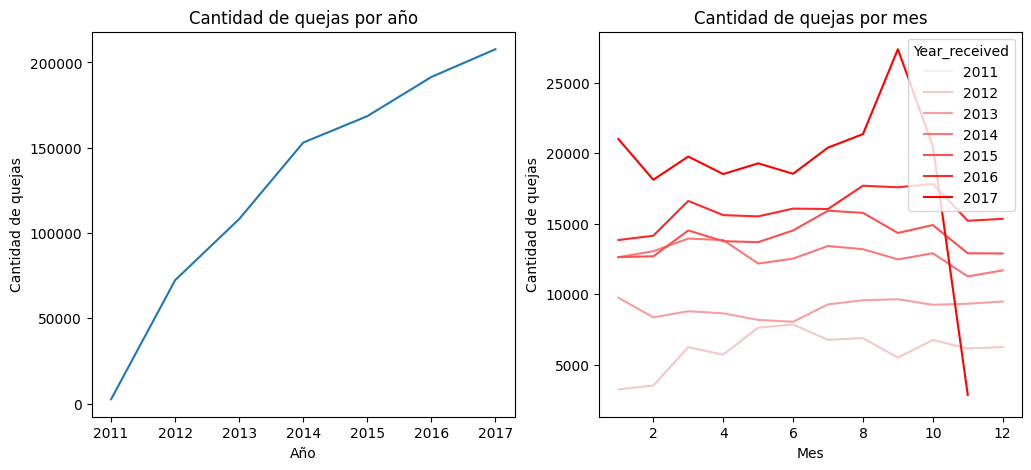

In [8]:
#Análisis por fecha de recibida la queja

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))


year = consumer.groupby("Year_received").size().reset_index(name = "Quantity")
year_mes = consumer.groupby(["Year_received", "Month_received"])["Month_received"].count().reset_index(name = "Quantity")
colors = sns.light_palette("red", n_colors= 7, reverse = False)

sns.lineplot(data = year, x = "Year_received", y = "Quantity", ax = axes[0], palette = "red")
axes[0].set_title("Cantidad de quejas por año")
axes[0].set_xlabel("Año")
axes[0].set_ylabel("Cantidad de quejas")

year_mes = consumer.groupby(["Year_received", "Month_received"])["Month_received"].count().reset_index(name = "Quantity")
sns.lineplot(data = year_mes, x = "Month_received", y = "Quantity", hue = "Year_received", ax = axes[1], palette = colors)
axes[1].set_xlabel("Mes")
axes[1].set_ylabel("Cantidad de quejas")
axes[1].set_title("Cantidad de quejas por mes")
plt.show()

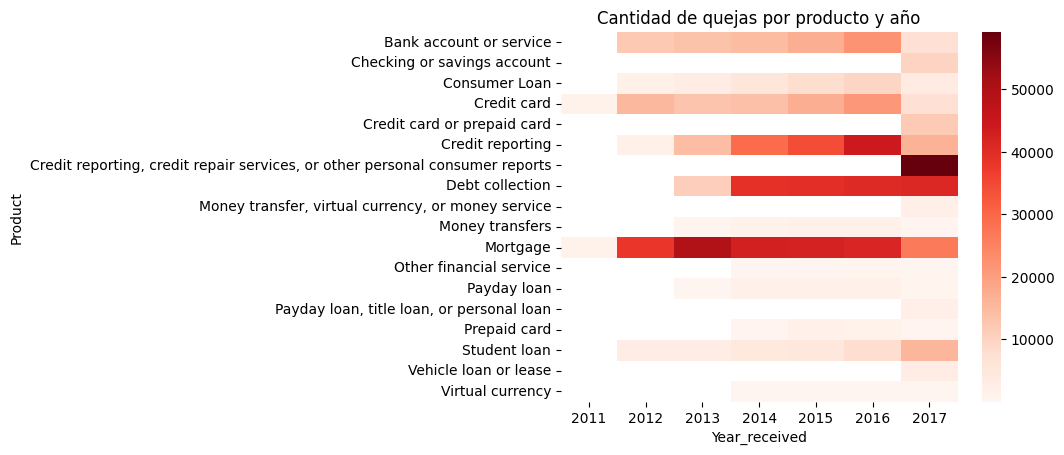

In [9]:
# Veamos ahora las quejas por año y los productos con mayores quejas

product_year = consumer.groupby(["Year_received", "Product"])["Product"].count().reset_index(name = "Amount")
product_year = product_year.pivot_table(values = "Amount", index = "Product", columns = "Year_received")
sns.heatmap(product_year, cmap="Reds")
plt.title("Cantidad de quejas por producto y año")
plt.show()

Sin embargo, también nos interesa conocer cuales son los productos con mayor cantidad de quejas:

In [10]:
print("Top 10 de productos con mas quejas en el historico de la base de datos:")
consumer["Product"].value_counts().reset_index(name = "Quejas").head(10)

Top 10 de productos con mas quejas en el historico de la base de datos:


,Product,Quejas
0,Mortgage,242194
1,Debt collection,171567
2,Credit reporting,140424
3,Credit card,89190
4,Bank account or service,86207
5,"Credit reporting, credit repair services, or o...",59186
6,Student loan,38612
7,Consumer Loan,31608
8,Credit card or prepaid card,11921
9,Checking or savings account,9947


**2. Canal de comunicación con mayor número de quejas**

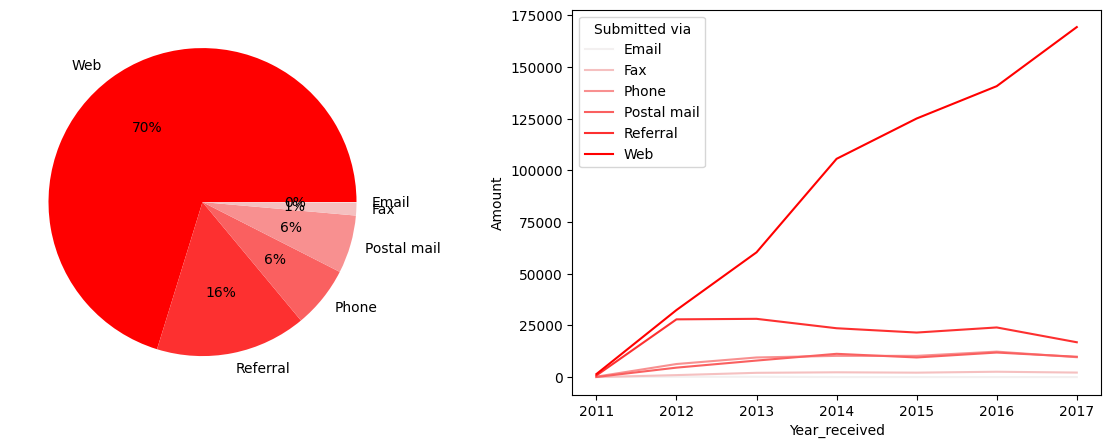

In [11]:
via = consumer["Submitted via"].value_counts().reset_index(name = "Quantity")
via_year = consumer.groupby(["Year_received", "Submitted via"])["Submitted via"].count().reset_index(name = "Amount")
palette = sns.light_palette("red", n_colors=6, reverse = True)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
axes[0].pie(via["Quantity"], labels = via["Submitted via"], autopct = '%.0f%%', colors = palette)
sns.lineplot(via_year, x = "Year_received", y = "Amount", hue = "Submitted via", 
             palette = sns.light_palette("red", n_colors = 6), ax = axes[1])
plt.show()

**3. Compañias que cuentan con más quejas: Top 10 de compañias**

In [12]:
company = consumer[["Company", "Year_received"]].value_counts().reset_index(name = "Quantity")
company = company.pivot_table(values= "Quantity", index = "Company", columns = "Year_received")
company["Total_Quejas"] = company.sum(axis = 1)
company.sort_values(by = "Total_Quejas", ascending = False).head(10)

Year_received,2011,2012,2013,2014,2015,2016,2017,Total_Quejas
Company,,,,,,,,
"BANK OF AMERICA, NATIONAL ASSOCIATION",583.0,16048.0,16459.0,10287.0,9833.0,9784.0,7494.0,70488.0
"EQUIFAX, INC.",NaN,622.0,4776.0,9963.0,12003.0,15973.0,27004.0,70341.0
Experian Information Solutions Inc.,NaN,726.0,5273.0,10246.0,10828.0,13949.0,18289.0,59311.0
WELLS FARGO & COMPANY,258.0,9452.0,11126.0,9168.0,9282.0,11201.0,7953.0,58440.0
"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NaN,464.0,3561.0,8040.0,10167.0,12985.0,18206.0,53423.0
JPMORGAN CHASE & CO.,374.0,7289.0,7989.0,7735.0,7968.0,8762.0,7181.0,47298.0
"CITIBANK, N.A.",306.0,5433.0,5878.0,5768.0,6202.0,8703.0,6123.0,38413.0
OCWEN LOAN SERVICING LLC,54.0,3762.0,4813.0,6272.0,4905.0,3489.0,2175.0,25470.0
CAPITAL ONE FINANCIAL CORPORATION,246.0,3877.0,3328.0,3343.0,3690.0,4260.0,4662.0,23406.0


Canal de contacto:

In [13]:
company_canal = consumer[["Company", "Submitted via"]].value_counts().reset_index(name = "Quantity")
company_canal = company_canal.pivot_table(values= "Quantity", index = "Company", columns = "Submitted via")
company_canal["Total_Quejas_Canal"] = company_canal.sum(axis = 1)
company_canal.sort_values(by = "Total_Quejas_Canal", ascending = False).head(10)

Submitted via,Email,Fax,Phone,Postal mail,Referral,Web,Total_Quejas_Canal
Company,,,,,,,
"BANK OF AMERICA, NATIONAL ASSOCIATION",47.0,1208.0,5498.0,3906.0,22759.0,37070.0,70488.0
"EQUIFAX, INC.",6.0,838.0,1801.0,6596.0,3417.0,57683.0,70341.0
Experian Information Solutions Inc.,11.0,879.0,1631.0,7284.0,3484.0,46022.0,59311.0
WELLS FARGO & COMPANY,30.0,1077.0,5527.0,3126.0,17070.0,31610.0,58440.0
"TRANSUNION INTERMEDIATE HOLDINGS, INC.",11.0,733.0,1622.0,5969.0,3251.0,41837.0,53423.0
JPMORGAN CHASE & CO.,23.0,804.0,3806.0,2655.0,13396.0,26614.0,47298.0
"CITIBANK, N.A.",15.0,536.0,2755.0,2399.0,6742.0,25966.0,38413.0
OCWEN LOAN SERVICING LLC,13.0,578.0,1535.0,1746.0,5673.0,15925.0,25470.0
CAPITAL ONE FINANCIAL CORPORATION,9.0,254.0,1969.0,1292.0,3854.0,16028.0,23406.0


**4. Zonas que presentan mayores afectaciones**

In [14]:
print(f"Contamos con {consumer.State.nunique()} estados en la base de datos")
print("")
print(f"Los estados son: {consumer.State.unique()}")

Contamos con 62 estados en la base de datos

Los estados son: ['MI' 'AL' 'PA' 'ID' 'VA' 'MN' 'CA' 'FL' 'TX' 'NV' 'NY' 'NE' 'MT' 'ME'
 'WI' 'WA' 'RI' 'NJ' 'IL' 'MS' 'OH' 'GA' 'MD' 'MA' 'SC' 'CO' 'SD' 'LA'
 'OR' 'IA' 'IN' 'NC' 'TN' 'VT' 'AZ' 'DE' nan 'MO' 'KS' 'WV' 'HI' 'ND' 'CT'
 'WY' 'NH' 'MP' 'DC' 'NM' 'KY' 'UT' 'AR' 'OK' 'PR' 'AP' 'AK' 'VI' 'MH'
 'AA' 'AE' 'GU' 'FM' 'AS' 'PW']


C:\Users\pablo\AppData\Local\Temp\ipykernel_10832\2465297730.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(state_consumer, x = "State", y = "Total_quejas", palette = sns.light_palette("red", n_colors = 10, reverse = True))


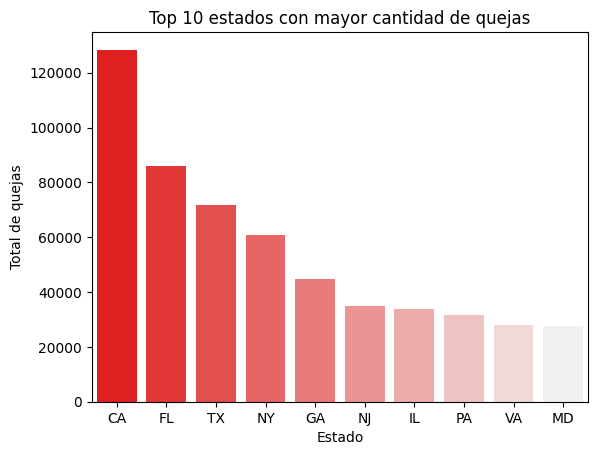

In [15]:
state_consumer  = consumer.groupby("State").size().sort_values(ascending=False).reset_index(name = "Total_quejas").head(10)
sns.barplot(state_consumer, x = "State", y = "Total_quejas", palette = sns.light_palette("red", n_colors = 10, reverse = True))
plt.xlabel("Estado")
plt.ylabel("Total de quejas")
plt.title("Top 10 estados con mayor cantidad de quejas")
plt.show()

In [16]:
state_consumer["Tasa_de_quejas (%)"] = np.round(state_consumer["Total_quejas"] / consumer.shape[0], 3) * 100
state_consumer

,State,Total_quejas,Tasa_de_quejas (%)
0,CA,128373,14.2
1,FL,85837,9.5
2,TX,71751,7.9
3,NY,60975,6.7
4,GA,44664,4.9
5,NJ,34886,3.9
6,IL,33635,3.7
7,PA,31646,3.5
8,VA,28144,3.1
9,MD,27765,3.1


In [17]:
product_state = consumer[["State", "Product"]].value_counts().reset_index(name = "quejas_producto")

def max_estado(dataframe, estado, producto, cantidad):
    df_2 = dataframe.groupby(estado)[cantidad].idxmax()
    df_resultado = dataframe.loc[df_2][[estado, producto, cantidad]]
    return df_resultado


product_max_state = max_estado(product_state, "State", "Product", "quejas_producto")
product_max_state = product_max_state.rename(columns={"Product": "Producto_max_quejas"})
product_max_state.sort_values(ascending=False, by = "quejas_producto").head(10)


,State,Producto_max_quejas,quejas_producto
0,CA,Mortgage,41648
1,FL,Mortgage,25641
4,TX,Debt collection,17912
7,NY,Mortgage,15765
11,GA,Mortgage,12115
13,NJ,Mortgage,11407
15,MD,Mortgage,9023
19,IL,Mortgage,8262
20,PA,Mortgage,8112
24,VA,Mortgage,7600


**5. Análisis de tiempos de respuestas de las compañias al consumidor y si cuentan con rtas oportunas**

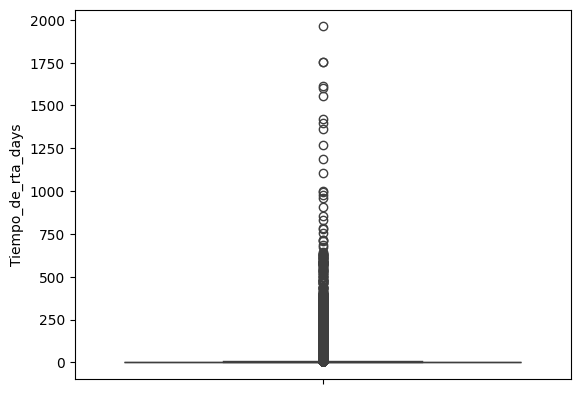

In [18]:
consumer["Tiempo_de_rta"] = consumer["Date sent to company"] - consumer["Date received"]
consumer["Tiempo_de_rta_days"] = consumer["Tiempo_de_rta"].astype(str).str.extract('(\d+)').astype(int) # Extraer el numero de una variable que tiene numero y texto al tiempo
sns.boxplot(consumer["Tiempo_de_rta_days"])
plt.show()

Debemos pensar en una limpieza de outliers:

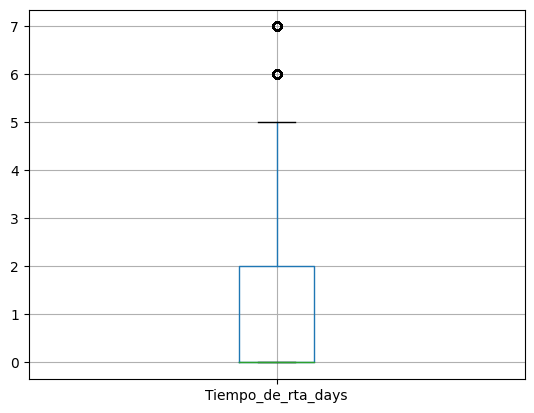

In [19]:
variable = consumer["Tiempo_de_rta_days"]

Q1 = variable.quantile(0.25)
Q3 = variable.quantile(0.75)
IIQ = Q3 - Q1

lim_inferior = Q1 - 1.5*IIQ
lim_superior = Q3 + 1.5*IIQ

seleccion_datos = ((variable >= lim_inferior) & (variable <= lim_superior))

datos_new = consumer[seleccion_datos]
datos_new.boxplot(["Tiempo_de_rta_days"])
plt.show()

Como vemos a través de la limpieza de outliers:

- El tiempo mínimo de respuesta por parte de las compañias es 0 días.
- El tiempo máximo de respuesta por parte de las compañias son 7 días.

Aunque no son indicadores tan criticos en terminos de tiempo de respuesta, podemos de alguna forma mejorar las paginas web y darle más privilegio a las quejas por via teléfonica y la web, donde vimos son los canales con mayor frecuencia para el envio de quejas.

In [20]:
timely_rta = consumer["Timely response?"].value_counts().reset_index(name = "Quantity")
timely_rta["Tasa de rta (%)"] = np.round(timely_rta["Quantity"] / consumer.shape[0], 3) * 100
timely_rta

,Timely response?,Quantity,Tasa de rta (%)
0,Yes,879376,97.3
1,No,24607,2.7


**6. Desarrollo de modelo de Machine Learning capaz de dar la predicciones acerca de la tendencia de quejas por producto**

In [21]:
df = consumer.groupby(["Year_received", "Product"]).size().reset_index(name = "Quantity")
df.head(2)

,Year_received,Product,Quantity
0,2011,Credit card,1260
1,2011,Mortgage,1276


In [22]:
def replace_product(dataframe, variable):
    if variable == 'Mortgage':
        return 1
    elif variable == 'Debt collection':
        return 2
    elif variable == 'Credit reporting':
        return 3
    elif variable == 'Credit card':
        return 4
    elif variable == 'Bank account or service':
        return 5
    elif variable == 'Credit reporting, credit repair services, or other personal consumer reports':
        return 6
    elif variable == 'Student loan':
        return 7
    elif variable == 'Consumer Loan':
        return 8
    elif variable == 'Credit card or prepaid card':
        return 9
    elif variable == 'Checking or savings account':
        return 10
    elif variable == 'Payday loan':
        return 11
    elif variable == 'Money transfers':
        return 12
    elif variable == 'Prepaid card':
        return 13
    elif variable == 'Vehicle loan or lease':
        return 14
    elif variable == 'Payday loan, title loan, or personal loan':
        return 15
    elif variable == 'Money transfer, virtual currency, or money service':
        return 16
    elif variable == 'Other financial service':
        return 17
    elif variable == 'Virtual currency':
        return 18

In [23]:
df["Id_product"] = df["Product"].apply(lambda x: replace_product(df, x))
df_2 = df.copy()
df_2.drop(columns = ["Product"], inplace = True)
df_2.head(3)

,Year_received,Quantity,Id_product
0,2011,1260,4
1,2011,1276,1
2,2012,12212,5


In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


X = df_2.drop(columns = "Quantity")
y = df_2["Quantity"]

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

print(f"Entrenamiento:", r2_score(y_train, y_train_hat))
print(f"Prueba:", r2_score(y_test, y_test_hat))

Entrenamiento: 0.49626642708439683
Prueba: 0.6796605188943579


In [100]:
ano_prediccion = int(input("Ingrese el año que desea predecir para el No. de quejas para los 19 productos"))

año = list([ano_prediccion] * 18)
producto = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
predicciones = np.array([año, producto]).T

ano_productos_predic = np.round(model.predict(predicciones), 0).astype(int)
df_3 = pd.DataFrame(data = {"Year_received": año, "Quantity": ano_productos_predic, "Id_product" : producto,})

c:\Users\pablo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Nuestros dos conjuntos de datos se dan en consiguiente, haciendo las siguientes aclaraciones de entrada:**
- Mediante la predicción, el producto No.1 (Hipoteca) sigue con la mayor cantidad de quejas.
- Generamos dos conjuntos de datos, el primero para la generación de insight y el otro para las predicciones
- La información mencionada anteriormenete, junto con las prediccion serán visualizadas en el tablero de Power BI
adjuntada en el mismo repositorio de GitHub.

In [102]:
df = pd.concat([df_2, df_3], axis = 0)
df["Quantity"] = df["Quantity"].apply(lambda x: x*(-1) if x < 0 else x)

def product_id(dataframe, variable):
    if variable == 1:
        return 'Mortgage'
    elif variable == 2:
        return 'Debt collection'
    elif variable == 3:
        return 'Credit reporting'
    elif variable == 4:
        return 'Credit card'
    elif variable == 5:
        return 'Bank account or service'
    elif variable == 6:
        return 'Credit reporting, credit repair services, or other personal consumer reports'
    elif variable == 7:
        return 'Student loan'
    elif variable == 8:
        return 'Consumer Loan'
    elif variable == 9:
        return 'Credit card or prepaid card'
    elif variable == 10:
        return 'Checking or savings account'
    elif variable == 11:
        return 'Payday loan'
    elif variable == 12:
        return 'Money transfers'
    elif variable == 13:
        return 'Prepaid card'
    elif variable == 14:
        return 'Vehicle loan or lease'
    elif variable == 15:
        return 'Payday loan, title loan, or personal loan'
    elif variable == 16:
        return 'Money transfer, virtual currency, or money service'
    elif variable == 17:
        return 'Other financial service'
    elif variable == 18:
        return 'Virtual currency'

df["Product"] = df["Id_product"].apply(lambda x: product_id(df, x))

In [104]:
df.to_excel("Complaints_predict.xlsx")

In [28]:
consumer.to_csv("Complaints_analyst.txt")